<h1 style='color:red' align="center">HEART DISEASE PREDICTABILITY</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
np.random.seed(42)

heart=pd.read_csv('heart.csv')

heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<h2 style='color:blue' align="center"> STATISTICAL  CORRELATION HEATMAP </h2>

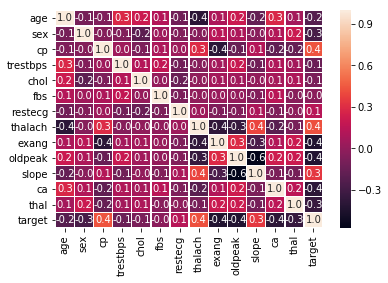

In [2]:
sb.heatmap(heart.corr(),annot=True,linewidths=.5,fmt='.1f')

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(heart.drop('target', 1), heart['target'], test_size = .2, random_state=10)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
select_feature=SelectKBest(chi2,k=5).fit(X_train,y_train)

#print('Score list:',select_feature.scores_)
#print('Feature list:',X_train.columns)

<h2 style='color:GREEN' align="center"> EXPLORATORY DATA ANALYSIS</h2>

<h2 style='color:black' align="center">Represents no. of people who are having heart disease and not having heart disease</h2>

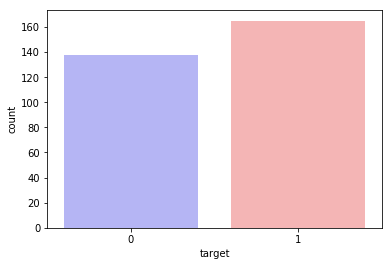

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='target',data=heart,palette='bwr')
plt.show()

In [5]:
countNoDisease=len(heart[heart.target==0])
countYesDisease=len(heart[heart.target==1])

print('% of patients not having heart disease : {:.2f}%'.format((countNoDisease)/(len(heart.target))*100))
print('% of patients having heart disease : {:.2f}%'.format((countYesDisease)/(len(heart.target))*100))

% of patients not having heart disease : 45.54%
% of patients having heart disease : 54.46%


<h2 style='color:blue' align="center">Represents no. of males and females in sex column</h2>

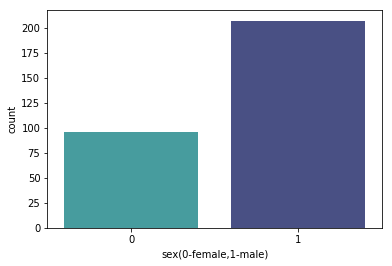

In [6]:
sns.countplot(x='sex',data=heart,palette='mako_r')
plt.xlabel("sex(0-female,1-male)")
plt.show()

In [7]:
countFemale=len(heart[heart.sex==0])
countMale=len(heart[heart.sex==1])

print('% of female patients : {:.2f}%'.format((countFemale)/(len(heart.sex))*100))
print('% of male patients   : {:.2f}%'.format((countMale)/(len(heart.sex))*100))

% of female patients : 31.68%
% of male patients   : 68.32%


<h2 style='color:BLACK' align="center">AGE vs FREQUENCY OF DISEASE</h2>

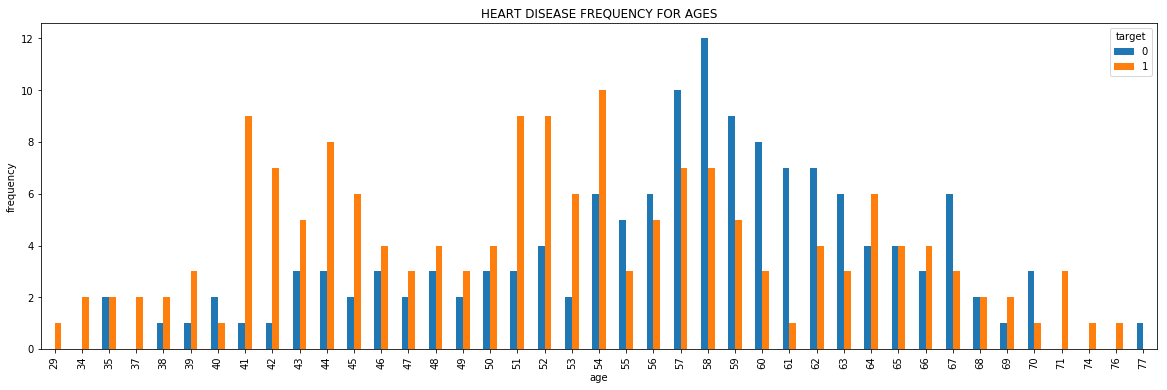

In [8]:
pd.crosstab(heart.age,heart.target).plot(kind='bar',figsize=(20,6))
plt.title("HEART DISEASE FREQUENCY FOR AGES")
plt.xlabel("age")
plt.ylabel('frequency')
#plt.savefig("heart dusease and ages.png")
plt.show()

<h2 style='color:GREEN' align="center">Represents no.of males and females who are having disease or not having disease.</h2> 

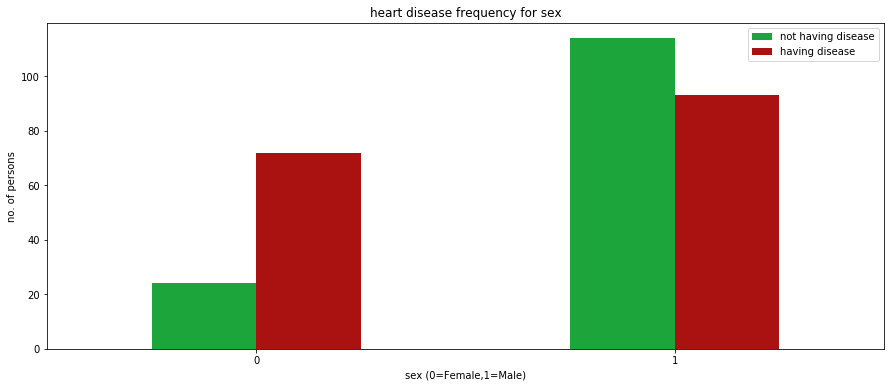

In [9]:
pd.crosstab(heart.sex,heart.target).plot(kind='bar',figsize=(15,6),color=['#1CA53B','#AA1111'])
plt.title('heart disease frequency for sex')
plt.xlabel('sex (0=Female,1=Male)')
plt.ylabel('no. of persons')
plt.xticks(rotation=0)
plt.legend(['not having disease','having disease'])
plt.show()

<h2 style='color:ORANGE' align="center">Represents no.of persons who are having disease or not having disease based on age and  maximum heart rate .</h2>

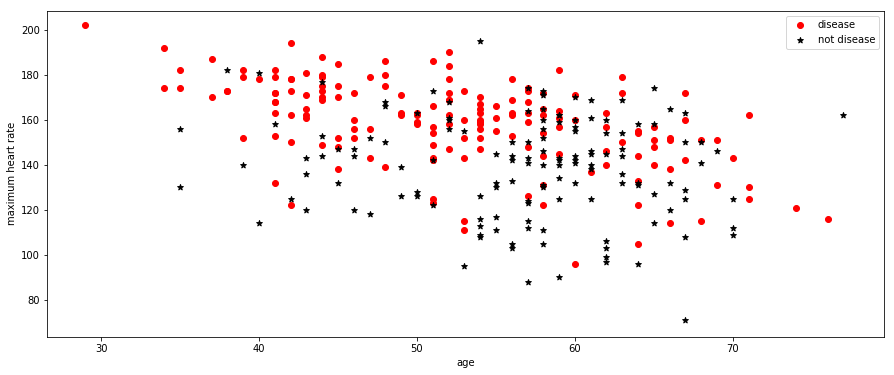

In [10]:
plt.figure(figsize=(15,6))
plt.scatter(x=heart.age[heart.target==1],y=heart.thalach[(heart.target==1)],color='red')
plt.scatter(x=heart.age[heart.target==0],y=heart.thalach[(heart.target==0)],color='k',marker='*')
plt.legend(['disease','not disease'])
plt.xlabel('age')
plt.ylabel('maximum heart rate')
plt.show()

<h2 style='color:GREEN' align="center">Represents no.of persons who are having disease or not having disease based on slope of peak exercise st segment</h2>

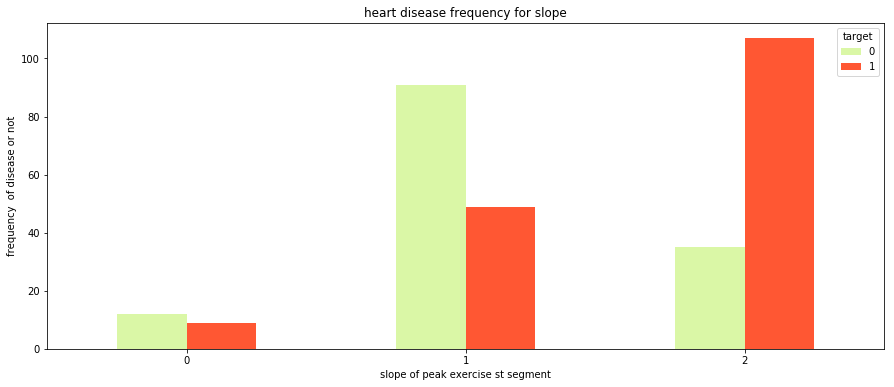

In [11]:
pd.crosstab(heart.slope,heart.target).plot(kind='bar',figsize=(15,6),color=['#DAF7A6','#FF5733'])
plt.title('heart disease frequency for slope')
plt.xlabel('slope of peak exercise st segment')
plt.xticks(rotation=0)
plt.ylabel('frequency  of disease or not')
plt.show()

<h2 style='color:PURPLE' align="center">Represents no.of persons who are having disease or not having disease based on fbs- (fasting blood sugar > 120 mg/dl)</h2>

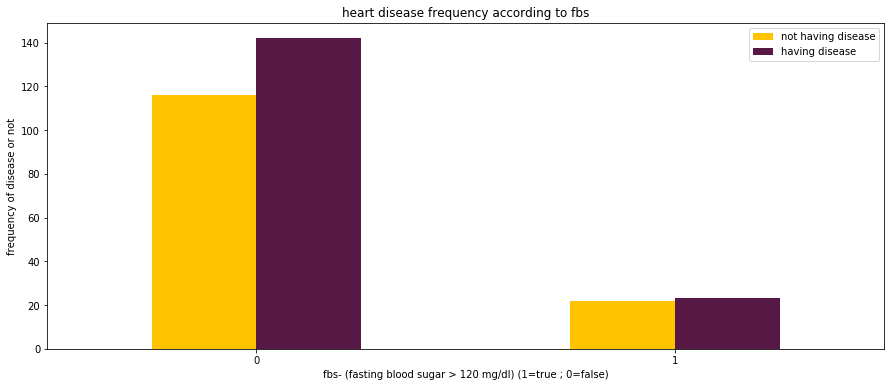

In [12]:
pd.crosstab(heart.fbs,heart.target).plot(kind='bar',figsize=(15,6),color=['#FFc300','#581845'])
plt.title('heart disease frequency according to fbs')
plt.xlabel('fbs- (fasting blood sugar > 120 mg/dl) (1=true ; 0=false)')
plt.xticks(rotation=0)
plt.legend(['not having disease','having disease'])
plt.ylabel('frequency of disease or not')
plt.show()

<h3 style='color:green' align="center">Represents no.of persons who are having disease or not having disease based on chest pain type</h3>

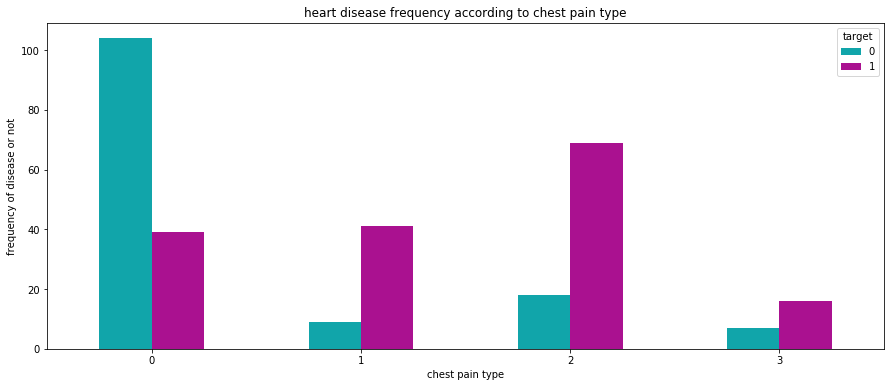

In [13]:
pd.crosstab(heart.cp,heart.target).plot(kind='bar',figsize=(15,6),color=['#11A5AA','#AA1190'])
plt.title('heart disease frequency according to chest pain type')
plt.xlabel('chest pain type')
plt.xticks(rotation=0)
plt.ylabel('frequency of disease or not')
plt.show()

C:\Users\siva\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\siva\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


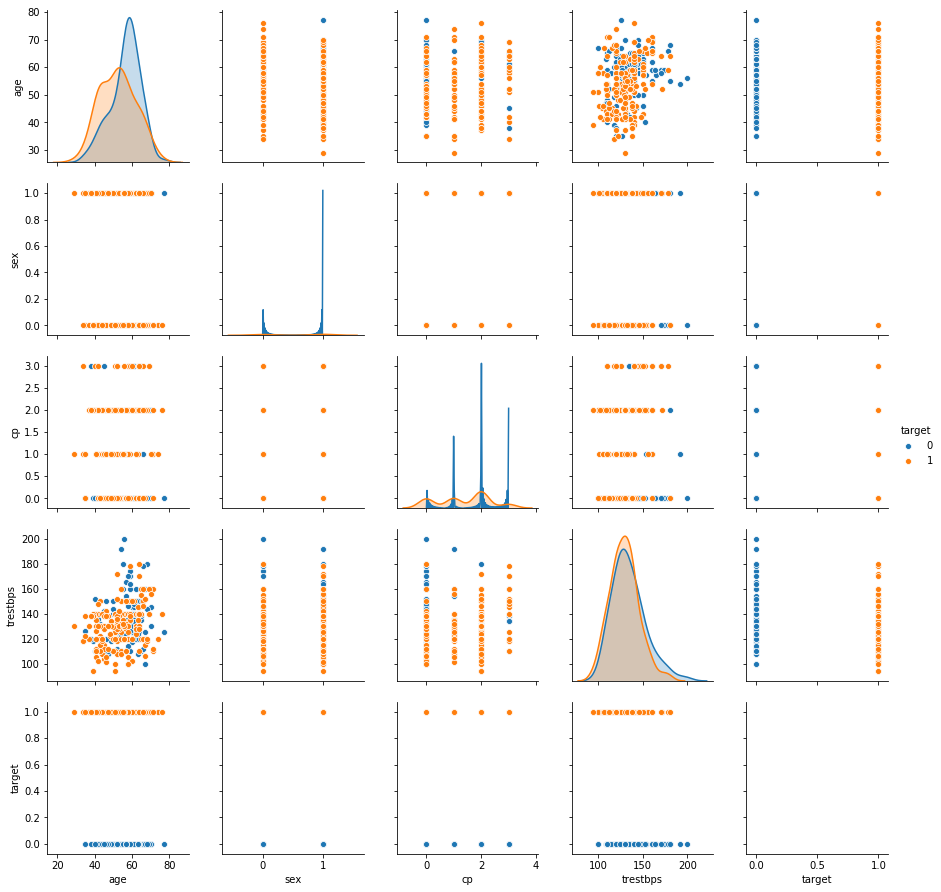

In [14]:
sns.pairplot(heart[['age','sex','cp','trestbps','target']],hue='target')

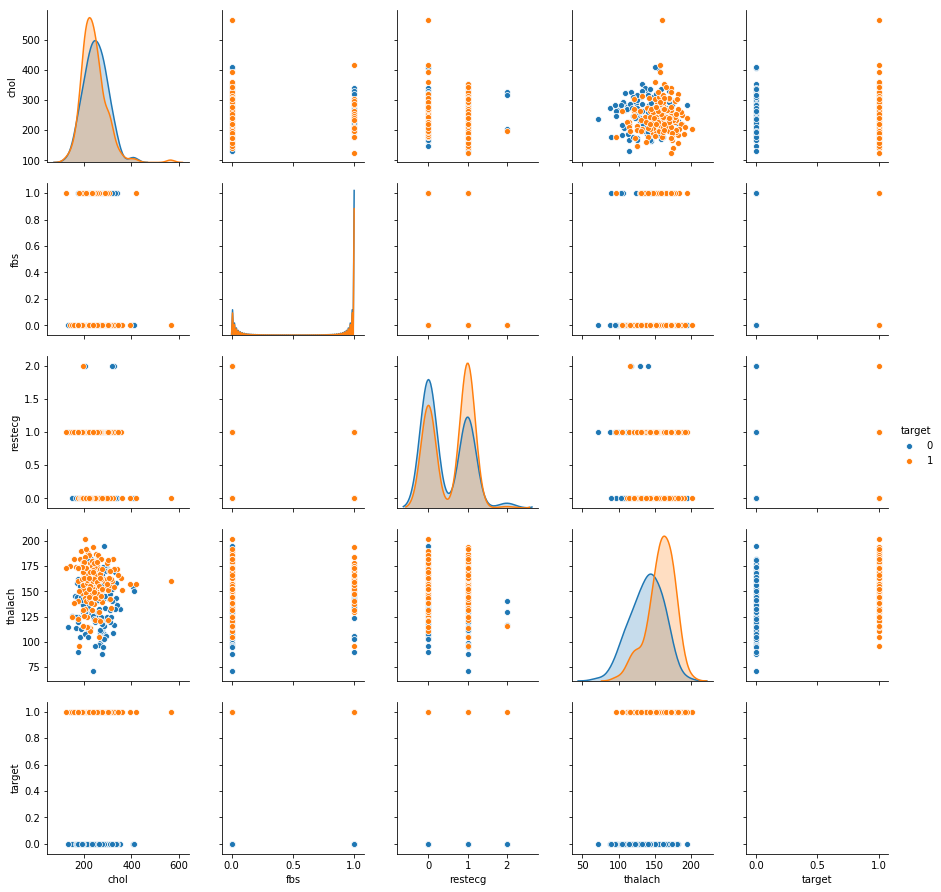

In [15]:
sns.pairplot(heart[['chol','fbs','restecg','thalach','target']],hue='target')

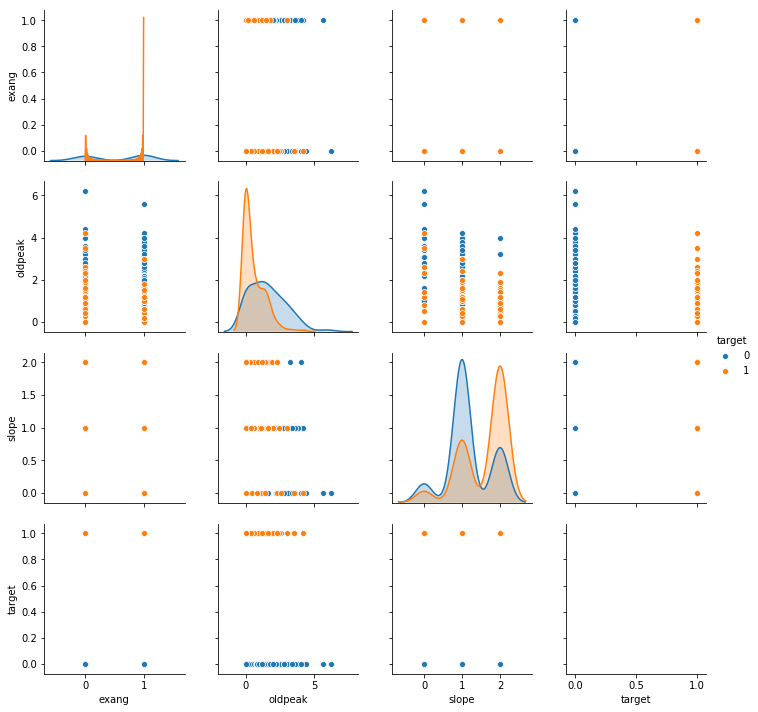

In [16]:
sns.pairplot(heart[['exang','oldpeak','slope','target']],hue='target')

<h2 style='color:green' align="center">RANDOM FOREST</h2>

In [17]:
X1=heart[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y1=heart['target']

from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=101)

from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier()

rfc.fit(X1_train,y1_train)

C:\Users\siva\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [18]:
rfc.score(X1_train,y1_train)

0.9950738916256158

In [19]:
predict1=rfc.predict(X1_test)

from sklearn.metrics import accuracy_score

<h2 style='color:blue' align="CORNER">ACCURACY SCORE</h2>

In [20]:
print("ACCURACY SCORE IS :",accuracy_score(predict1,y1_test)*100)

ACCURACY SCORE IS : 84.0


In [21]:
heart_df=pd.read_csv("heart_predict.csv")


df=rfc.predict(heart_df)



heart_df['predict_target']=df

### INPUT LABELS

In [22]:
X1_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3


### TARGET LABELS

In [23]:
y1_test.head()

221    0
8      1
89     1
154    1
201    0
Name: target, dtype: int64

<h2 style='color:green' align="CORNER">HEART DISEASE PREDICTION </h2>

In [24]:
a=rfc.predict([[55 ,1, 0, 140, 217, 0, 1, 111, 1, 5.6, 0, 0, 3]])
print("Heart Disease PREDICTABILITY IS :",a)

Heart Disease PREDICTABILITY IS : [0]


In [25]:
heart_df.to_csv("heart_prediction1.csv")

